## Clustering FW

### Import Data

In [1]:
import pandas as pd 

final_df = pd.read_csv('players_rating_potential_database.csv')

In [2]:
final_df_fw = final_df[final_df["Position"] == "Forwards"].copy()

In [3]:
final_df_fw

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential
1026,Romelu Lukaku,1993-05-13,SerieA,Napoli,Left,Belgium,Forwards,2843,0.44,0.32,...,0.0,0.0,1.08,1.33,1.77,42.9,1838,32.0,79.821259,79.821259
1027,Lautaro Martínez,1997-08-22,SerieA,Internazionale,Right,Argentina,Forwards,2564,0.42,0.11,...,0.0,0.0,2.56,1.23,1.33,47.9,1933,28.0,80.853042,80.853042
1028,Marcus Thuram,1997-08-06,SerieA,Internazionale,Right,France,Forwards,2290,0.55,0.16,...,0.0,0.0,2.79,1.77,1.34,57.0,1933,28.0,81.799962,81.799962
1029,Mehdi Taremi,1992-07-18,SerieA,Internazionale,Right,Iran,Forwards,816,0.11,0.22,...,0.0,0.0,3.20,2.10,2.65,44.2,1933,33.0,76.021652,76.021652
1030,Joaquín Correa,1994-08-13,SerieA,Internazionale,Right,Argentina,Forwards,731,0.25,0.25,...,0.0,0.0,3.82,0.74,2.22,25.0,1933,31.0,75.613077,75.613077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Patson Daka,1998-10-09,PremierLeague,Leicester City,Right,Zambia,Forwards,736,0.12,0.00,...,0.0,0.0,2.20,1.22,3.42,26.3,1960,27.0,71.113977,71.113977
1342,Liam Delap,2003-02-08,PremierLeague,Ipswich Town,Right,England,Forwards,2593,0.42,0.07,...,0.0,0.0,2.36,1.91,2.57,42.6,1797,22.0,75.364818,79.580400
1343,George Hirst,1999-02-15,PremierLeague,Ipswich Town,Right,Scotland,Forwards,661,0.41,0.14,...,0.0,0.0,1.63,4.36,3.13,58.2,1797,26.0,67.897459,67.897459
1344,Adam Armstrong,1997-02-10,PremierLeague,West Bromwich Albion,Right,England,Forwards,1248,0.14,0.14,...,0.0,0.0,1.66,0.36,0.65,35.7,1538,28.0,71.814573,71.814573


In [4]:
# 2. Define target and input features //
meta_cols = ['Player', 'Position', 'Club', 'Birthdate'] 

forwards_features = [
    'Goals', 'Assists', 'npxG + xAG',                 # Scoring and expected involvement
    'Shots on Target', 'Goals/Shot',                  # Efficiency and quality of finishing
    'Average Shot Distance',                          # Shot selection
    'Touches (Att Pen)', 'Touches (Att 3rd)',         # Involvement in danger areas
    'Progressive Carries',                            # Beating defenders and directness
    'Carries into Penalty Area',                      # Penetration
    'Pass Completion %', 'Live-ball Passes',          # Linking play
    'SCA (Shot)', 'SCA (Take-On)', 'SCA (Live-ball Pass)', # All shot creation channels
    'GCA (Shot)', 'GCA (Take-On)', 'GCA (Live-ball Pass)', # All goal creation channels
    'Through Balls', 'Crosses',                       # Direct creativity
    'Offsides',                                       # Movement behind defense
    'Fouls Drawn',                                    # Provoking fouls, winning set pieces
    'Aerials Won',                                    # Headers, target man play
    'Miscontrols', 'Dispossessed'                     # Ball retention under pressure
]

In [5]:
df_meta = final_df_fw[meta_cols]

X = final_df_fw[forwards_features]

X

,Goals,Assists,npxG + xAG,Shots on Target,Goals/Shot,Average Shot Distance,Touches (Att Pen),Touches (Att 3rd),Progressive Carries,Carries into Penalty Area,...,GCA (Shot),GCA (Take-On),GCA (Live-ball Pass),Through Balls,Crosses,Offsides,Fouls Drawn,Aerials Won,Miscontrols,Dispossessed
1026,0.44,0.32,0.44,0.63,0.18,14.3,4.53,12.28,0.98,0.73,...,0.00,0.03,0.47,0.19,0.13,0.76,1.14,1.33,1.74,1.68
1027,0.42,0.11,0.62,1.19,0.12,13.8,5.69,17.34,1.19,0.42,...,0.07,0.04,0.18,0.32,0.46,0.77,1.47,1.23,2.46,1.90
1028,0.55,0.16,0.56,1.06,0.22,13.1,6.29,17.25,2.44,1.41,...,0.04,0.08,0.39,0.16,0.51,0.51,1.41,1.77,2.16,1.14
1029,0.11,0.22,0.46,0.55,0.00,12.0,4.96,16.32,1.10,0.66,...,0.11,0.00,0.22,0.44,0.11,0.66,1.43,2.10,1.54,0.55
1030,0.25,0.25,0.50,0.74,0.14,13.3,4.80,23.15,2.71,0.49,...,0.00,0.12,0.37,0.62,0.99,0.25,1.72,0.74,1.60,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.12,0.00,0.16,0.49,0.07,14.8,3.55,11.86,1.35,0.73,...,0.00,0.12,0.00,0.24,0.37,0.37,2.32,1.22,2.45,1.47
1342,0.42,0.07,0.34,1.01,0.15,16.0,3.19,11.63,2.12,1.04,...,0.00,0.07,0.10,0.28,0.17,0.49,1.77,1.91,3.61,2.08
1343,0.41,0.14,0.34,0.95,0.21,11.3,3.81,13.75,1.23,0.95,...,0.14,0.00,0.27,0.00,0.41,0.41,1.63,4.36,2.86,2.18
1344,0.14,0.14,0.25,0.50,0.08,16.6,3.53,13.85,1.80,0.43,...,0.22,0.00,0.07,0.00,1.01,0.65,0.36,0.36,0.79,1.30


### PCA

In [6]:
# Now ready for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")

Number of components explaining 95% variance: 17


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(X, k_range):
    inertias = []
    silhouettes = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot Inertia (WCSS)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Within-Cluster Sum of Squares')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes

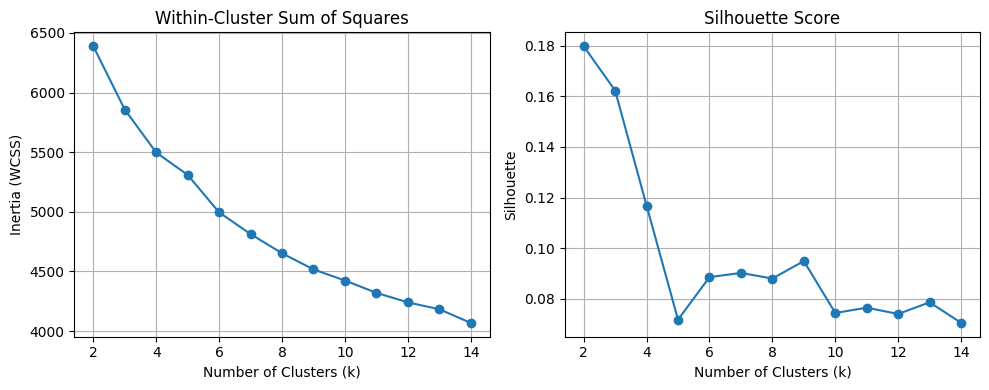

In [8]:
k_range = range(2, 15)
inertias, silhouettes = plot_kmeans_metrics(X_pca, k_range)

In [9]:
final_kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

X = X.copy()  # Make an explicit copy if X came from slicing
X['cluster'] = cluster_labels

### TSNE & UMAP

In [10]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, cluster_labels, df_meta, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
    df_umap['Cluster'] = cluster_labels
    df_umap['Player'] = df_meta['Player'].values
    df_umap['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_umap, x='UMAP-1', y='UMAP-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('UMAP Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_umap


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


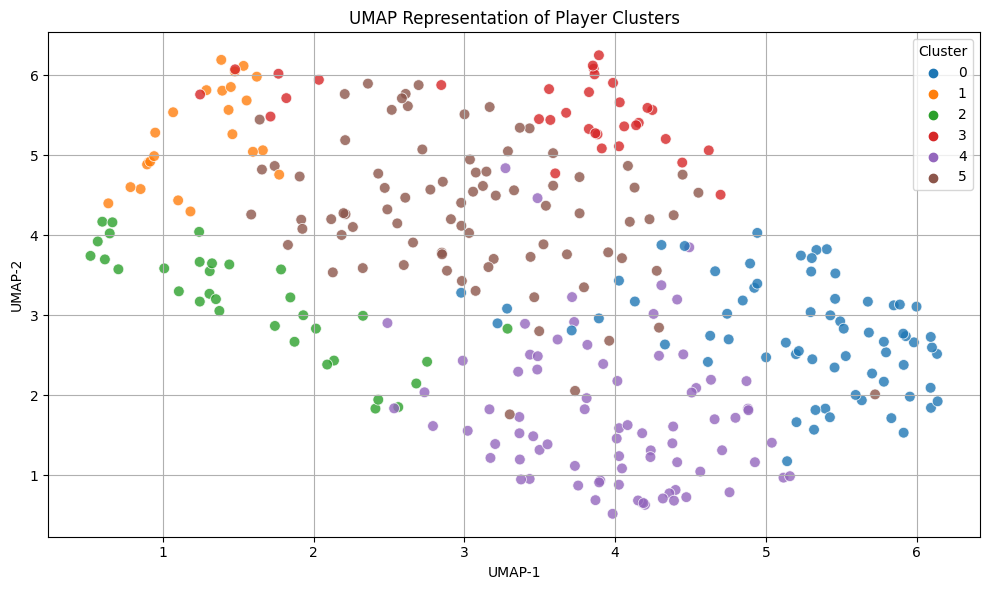

In [11]:
df_umap = plot_umap(X_pca, cluster_labels, df_meta)

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
                n_iter=n_iter, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
    df_tsne['Cluster'] = cluster_labels
    df_tsne['Player'] = df_meta['Player'].values
    df_tsne['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('t-SNE (Tuned) Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_tsne

/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


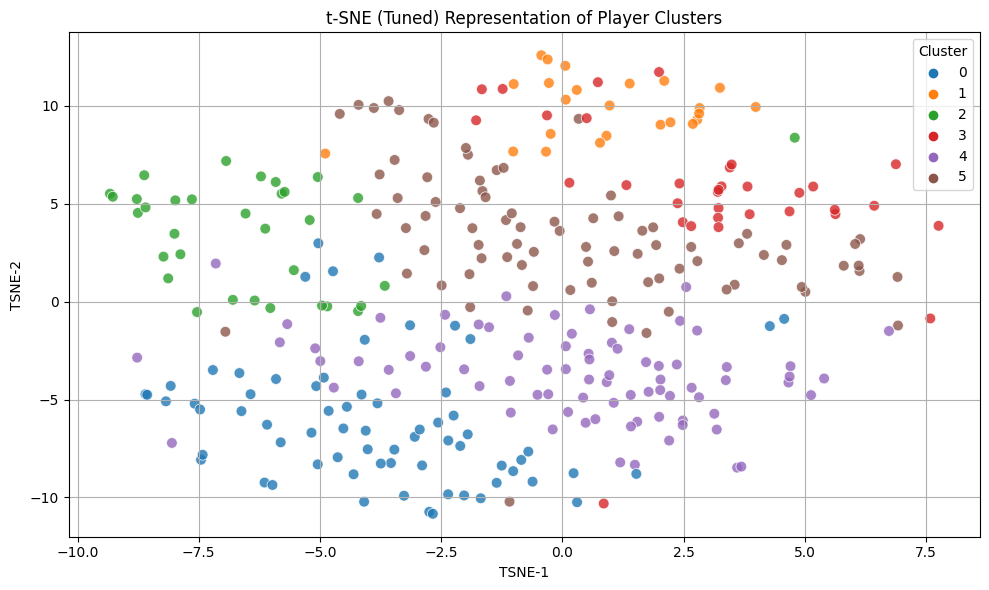

In [13]:
df_tsne = plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=300)

### Playstyle defintion

In [14]:
final_df_fw["Cluster"] = cluster_labels

final_df_fw

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1026,Romelu Lukaku,1993-05-13,SerieA,Napoli,Left,Belgium,Forwards,2843,0.44,0.32,...,0.0,1.08,1.33,1.77,42.9,1838,32.0,79.821259,79.821259,5
1027,Lautaro Martínez,1997-08-22,SerieA,Internazionale,Right,Argentina,Forwards,2564,0.42,0.11,...,0.0,2.56,1.23,1.33,47.9,1933,28.0,80.853042,80.853042,5
1028,Marcus Thuram,1997-08-06,SerieA,Internazionale,Right,France,Forwards,2290,0.55,0.16,...,0.0,2.79,1.77,1.34,57.0,1933,28.0,81.799962,81.799962,5
1029,Mehdi Taremi,1992-07-18,SerieA,Internazionale,Right,Iran,Forwards,816,0.11,0.22,...,0.0,3.20,2.10,2.65,44.2,1933,33.0,76.021652,76.021652,5
1030,Joaquín Correa,1994-08-13,SerieA,Internazionale,Right,Argentina,Forwards,731,0.25,0.25,...,0.0,3.82,0.74,2.22,25.0,1933,31.0,75.613077,75.613077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Patson Daka,1998-10-09,PremierLeague,Leicester City,Right,Zambia,Forwards,736,0.12,0.00,...,0.0,2.20,1.22,3.42,26.3,1960,27.0,71.113977,71.113977,4
1342,Liam Delap,2003-02-08,PremierLeague,Ipswich Town,Right,England,Forwards,2593,0.42,0.07,...,0.0,2.36,1.91,2.57,42.6,1797,22.0,75.364818,79.580400,5
1343,George Hirst,1999-02-15,PremierLeague,Ipswich Town,Right,Scotland,Forwards,661,0.41,0.14,...,0.0,1.63,4.36,3.13,58.2,1797,26.0,67.897459,67.897459,0
1344,Adam Armstrong,1997-02-10,PremierLeague,West Bromwich Albion,Right,England,Forwards,1248,0.14,0.14,...,0.0,1.66,0.36,0.65,35.7,1538,28.0,71.814573,71.814573,4


In [15]:
cluster_summary = X.copy()
summary_stats = cluster_summary.groupby('cluster').agg(['mean'])

In [16]:
mean_per_cluster = summary_stats.xs('mean', axis=1, level=1)
std_across_clusters = mean_per_cluster.std(axis=0)

summary_stats

,Goals,Assists,npxG + xAG,Shots on Target,Goals/Shot,Average Shot Distance,Touches (Att Pen),Touches (Att 3rd),Progressive Carries,Carries into Penalty Area,...,GCA (Shot),GCA (Take-On),GCA (Live-ball Pass),Through Balls,Crosses,Offsides,Fouls Drawn,Aerials Won,Miscontrols,Dispossessed
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.299118,0.089265,0.418824,0.860588,0.116324,12.935294,4.648971,14.330147,0.829118,0.419265,...,0.062353,0.016176,0.125588,0.063235,0.392794,0.659706,1.559412,4.800882,2.978235,1.467206
1,0.542083,0.269167,0.658333,1.330833,0.125000,15.837500,6.400417,23.110000,2.903333,1.535417,...,0.056250,0.102083,0.388750,0.300417,1.564583,0.430833,1.375417,1.061250,2.674167,1.550000
2,0.228182,0.115455,0.333333,0.679394,0.097273,18.336364,3.451818,19.218485,2.086364,0.710000,...,0.050303,0.010909,0.156364,0.169697,2.741818,0.425758,1.773333,1.137879,3.044545,1.843939
3,0.742727,0.124242,0.758485,1.510303,0.196667,12.406061,6.621818,17.589091,1.369091,0.794848,...,0.090000,0.036364,0.176667,0.132727,0.562727,0.622424,1.190909,2.236364,2.662424,1.398485
4,0.298875,0.065875,0.345750,0.735875,0.136375,14.596250,3.389375,11.334000,0.853625,0.350125,...,0.045500,0.012875,0.091125,0.083000,0.421750,0.606250,1.254625,1.897625,2.234375,1.115000
5,0.407805,0.157317,0.499146,1.036098,0.140366,14.636585,4.763171,15.109512,1.605610,0.803171,...,0.035854,0.048293,0.217317,0.133537,0.635000,0.682195,1.302927,1.808659,2.680244,1.495854


In [17]:
summary_stats.to_excel(('cluster_summary_fw_vf.xlsx'), index=True)

Top players per Cluster

In [18]:
def top_players_per_cluster(df, rating_col='Rating', cluster_col='Cluster', top_n=10):
    top_players = (
        df.sort_values(by=[cluster_col, rating_col], ascending=[True, False])
          .groupby(cluster_col)
          .head(top_n)
          .reset_index(drop=True)
    )
    return top_players[['Player', 'Position', 'Club', cluster_col, rating_col]]


In [19]:
top_10_per_cluster = top_players_per_cluster(final_df_fw, rating_col='Rating', cluster_col='Cluster', top_n=10)
print(top_10_per_cluster)

                  Player  Position                     Club  Cluster  \
0          Rodrigo Muniz  Forwards                   Fulham        0   
1        Ludovic Ajorque  Forwards                    Brest        0   
2           Ante Budimir  Forwards                  Osasuna        0   
3             Jonas Wind  Forwards                Wolfsburg        0   
4          Brian Brobbey  Forwards                     Ajax        0   
5                   Beto  Forwards                  Everton        0   
6            Lucas Höler  Forwards                 Freiburg        0   
7         Thijs Dallinga  Forwards                  Bologna        0   
8           Paul Onuachu  Forwards              Southampton        0   
9           Vedat Muriqi  Forwards                 Mallorca        0   
10         Kylian Mbappé  Forwards              Real Madrid        1   
11            Harry Kane  Forwards            Bayern Munich        1   
12       Viktor Gyökeres  Forwards              Sporting CP     

### Spider Charts

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === STEP 0 — Inputs ===
features = [
    'Goals', 'npxG + xAG',                                          # Scoring and expected involvement
    'Goals/Shot', 'Average Shot Distance',                          # Shot selection
    'Touches (Att Pen)', 'Touches (Att 3rd)',                       # Involvement in danger areas
    'Carries into Penalty Area',                                    # Penetration
    'GCA (Shot)', 'SCA (Take-On)', 'SCA (Live-ball Pass)',          # All goal creation channels
    'Aerials Won',                                                  # Headers, target man play
]

# Define custom cluster labels for each cluster index
cluster_names = {
    0: "Aerial Target Men",
    1: "Hybrid Line Leaders",
    2: "Creative Withdrawn Forwards",
    3: "Traditional Finishers",
    4: "Physical Disruptors",
    5: "Dynamic Strike-Runners"
}

# Assuming your DataFrame with 300 players is named `df_players` and has a 'Cluster' column
cluster_sizes = final_df_fw.groupby("Cluster").size()

# Build the cluster_names dictionary
cluster_names = {
    cluster: (cluster_names[cluster], size)
    for cluster, size in cluster_sizes.items()
}

# Optional: display the result
cluster_names

{0: ('Aerial Target Men', 68),
 1: ('Hybrid Line Leaders', 24),
 2: ('Creative Withdrawn Forwards', 33),
 3: ('Traditional Finishers', 33),
 4: ('Physical Disruptors', 80),
 5: ('Dynamic Strike-Runners', 82)}

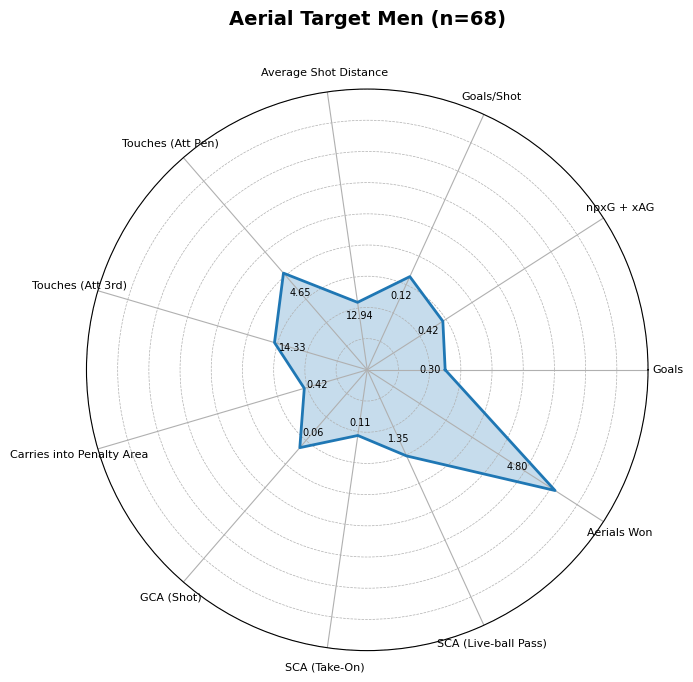

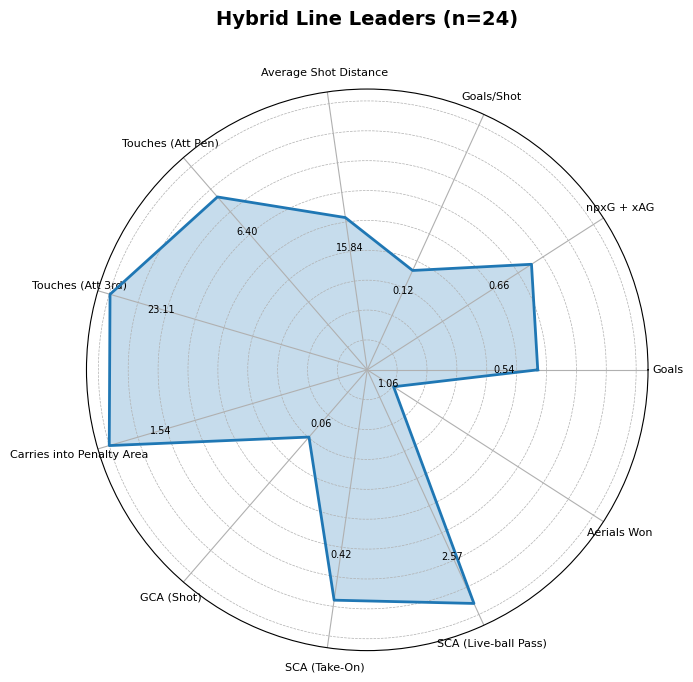

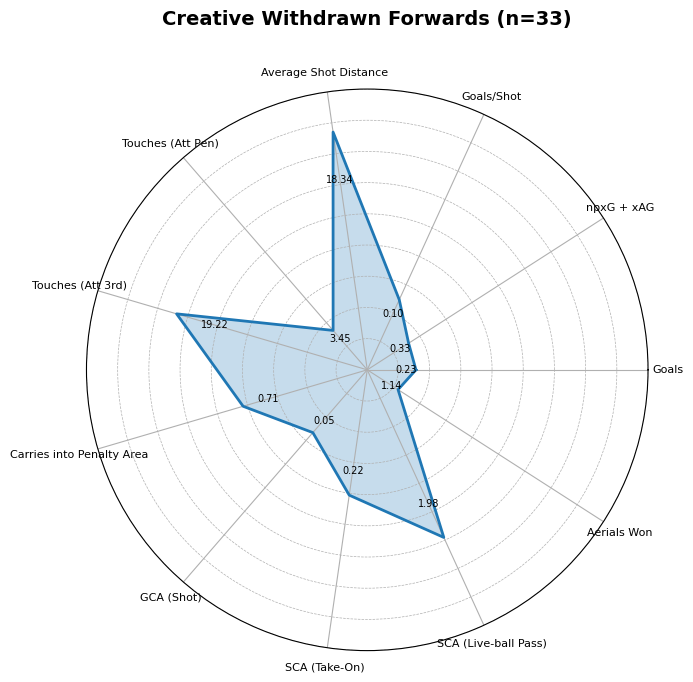

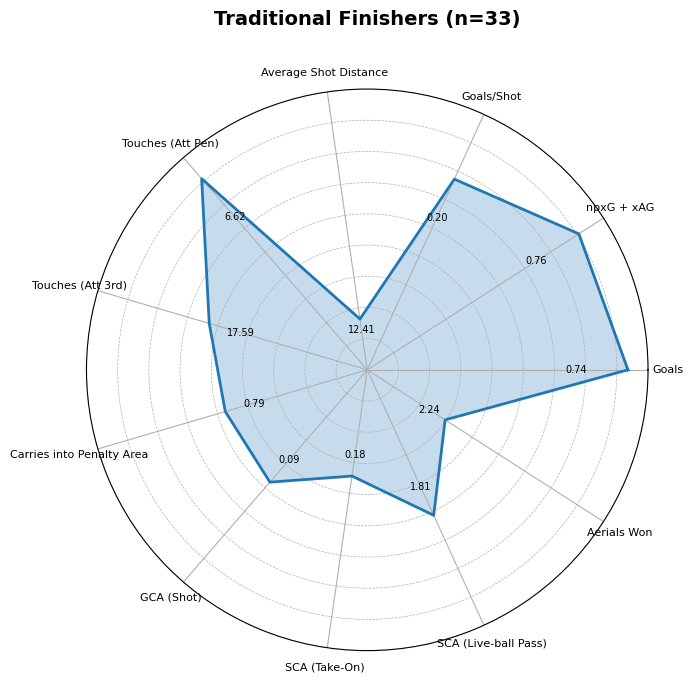

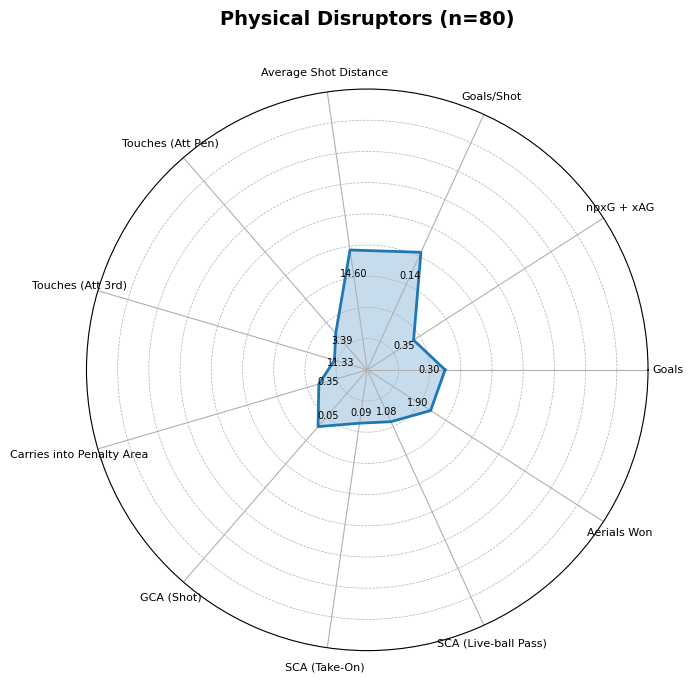

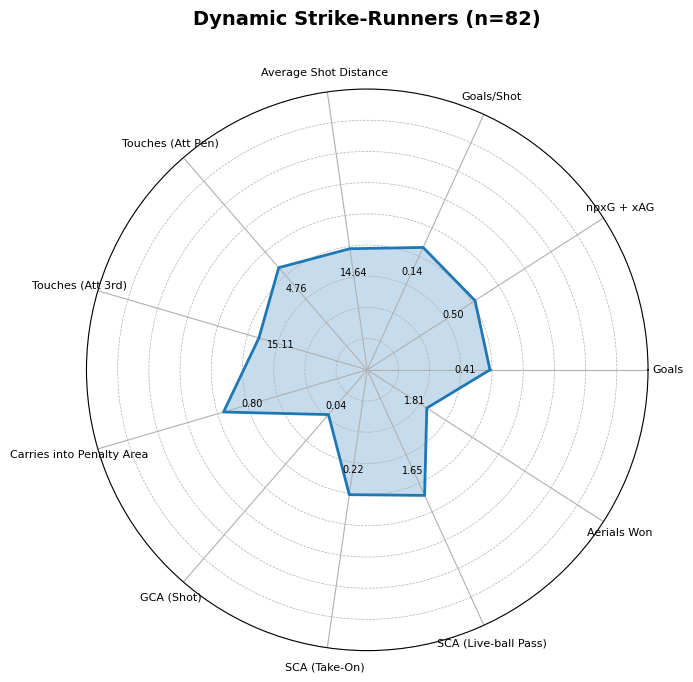

In [21]:
# === STEP 1 — Compute raw cluster means ===
raw_means = final_df_fw.groupby("Cluster")[features].mean()

# === STEP 2 — Compute 5th and 95th percentiles for full AM/W pool ===
lower_bounds = final_df_fw[features].quantile(0.05)
upper_bounds = final_df_fw[features].quantile(0.95)

# === STEP 3 — Normalize raw cluster means to build scaled radar profiles ===
range_vals = (upper_bounds - lower_bounds).replace(0, 1)
scaled_means = (raw_means - lower_bounds) / range_vals
scaled_means = scaled_means.clip(0, 1)

# === STEP 4 — Radar Chart Function ===
def create_annotated_radar(scaled_row, raw_row, cluster_id, title, n_lines=10):
    labels = scaled_row.index
    stats = scaled_row.values
    raw_stats = raw_row.values

    # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    raw_stats = np.concatenate((raw_stats, [raw_stats[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # Radar plot
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Inner gridlines (no % labels)
    ax.set_yticks(np.linspace(0, 1, n_lines))
    ax.set_yticklabels([])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)

    # Annotate raw values near inner vertices (85% of scaled radius)
    for angle, scaled_val, raw_val in zip(angles[:-1], stats[:-1], raw_stats[:-1]):
        radius = scaled_val * 0.8
        ax.text(
            angle, radius, f"{raw_val:.2f}",
            ha='center', va='center', fontsize=7, color='black'
        )


    # Title with cluster name and size
    cluster_label, size = cluster_names[cluster_id]
    ax.set_title(f"{cluster_label} (n={size})", size=14, weight='bold', y=1.1)

    plt.tight_layout()
    return fig


# === STEP 5 — Plot or Export Charts ===
for cluster_id in raw_means.index:
    fig = create_annotated_radar(
        scaled_row=scaled_means.loc[cluster_id],
        raw_row=raw_means.loc[cluster_id],
        cluster_id=cluster_id,
        title=cluster_names[cluster_id][0]
    )
    plt.show()


### Find similar players Cosine Similarity

In [22]:
from sklearn.preprocessing import StandardScaler

# Step 1: Extract numerical features
feature_cols = [
    'npxG: Non-Penalty xG' , 'xAG: Exp. Assisted Goals',  # Direct goal involvement and advanced expected contribution
    'Shots on Target', 'Goals/Shot',                  # Shooting efficiency and accuracy
    'Average Shot Distance',                          # Indicates shot selection and tactical role
    'Progressive Carries', 'Progressive Carrying Distance', # Ball progression via dribbling
    'Carries into Final Third', 'Carries into Penalty Area', # Advanced movement into dangerous zones
    'Successful Take-Ons', 'Successful Take-On %',    # 1v1 dribbling ability
    'Touches (Att 3rd)', 'Touches (Att Pen)',         # Presence in attacking areas
    'Pass Completion %', 'Live-ball Passes',          # Ball retention and passing in play
    'Progressive Passes', 'Progressive Passing Distance', # Forward passing impact
    'Passes into Final Third', 'Passes into Penalty Area', # Penetrative passing
    'Crosses', 'Crosses into Penalty Area',           # Creating chances from wide areas
    'Through Balls', 'Switches',                      # Creativity and vision
    'SCA (Live-ball Pass)', 'SCA (Take-On)', 'SCA (Shot)', # Shot-creating actions via various means
    'GCA (Live-ball Pass)', 'GCA (Take-On)', 'GCA (Shot)', # Goal-creating actions
    'Miscontrols', 'Dispossessed',                    # Ball security under pressure
    'Fouls Drawn'                                     # Ability to win set pieces
]

# Step 2: Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_fw[feature_cols])

# Step 3: Create a scaled DataFrame to use
df_scaled = final_df_fw.copy()
df_scaled[feature_cols] = X_scaled

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(player1, player2, df, feature_cols):
    vec1 = df.loc[df['Player'] == player1, feature_cols].values.flatten()
    vec2 = df.loc[df['Player'] == player2, feature_cols].values.flatten()

    similarity = cosine_similarity([vec1], [vec2])[0, 0]
    return round(similarity * 100, 2)  # Percent similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pca_cluster_similarity(player1, player2, df, df_pca, cluster_labels, boost=1.1):
    idx1 = df[df['Player'] == player1].index[0]
    idx2 = df[df['Player'] == player2].index[0]

    # Get row positions, not index values
    pos1 = df.index.get_loc(idx1)
    pos2 = df.index.get_loc(idx2)

    vec1 = df_pca[pos1]
    vec2 = df_pca[pos2]

    sim = cosine_similarity([vec1], [vec2])[0, 0] * 100
    if cluster_labels.iloc[pos1] == cluster_labels.iloc[pos2]:
        sim *= boost

    return round(min(sim, 100), 2)


In [25]:
def most_similar_players_pca_cluster(player_name, df, df_pca, cluster_labels, top_n=10, boost=1.1):
    player_index = {player: idx for idx, player in enumerate(df['Player'])}
    base_idx = player_index[player_name]
    base_vec = df_pca[base_idx]

    similarities = []
    for i, other_name in enumerate(df['Player']):
        if other_name == player_name:
            continue
        other_vec = df_pca[i]
        sim = cosine_similarity([base_vec], [other_vec])[0, 0] * 100
        if cluster_labels[i] == cluster_labels[base_idx]:
            sim *= boost
        similarities.append((other_name, round(min(sim, 100), 2)))

    return sorted(similarities, key=lambda x: -x[1])[:top_n]


In [27]:
most_similar_players_pca_cluster("Harry Kane", final_df_fw, X_pca, cluster_labels)

[('Vangelis Pavlidis', 92.23),
 ('Marco Asensio', 83.97),
 ('Joël Piroe', 82.89),
 ('Ricardo Pepi', 79.97),
 ('Dante Vanzeir', 78.09),
 ('Julián Álvarez', 76.04),
 ('Amine Gouiri', 73.6),
 ('Georges Mikautadze', 72.24),
 ('Pedro', 71.42),
 ('Deniz Undav', 70.41)]

In [28]:
final_df_am_reset = final_df_fw.reset_index(drop=True)
cluster_labels_reset = final_df_am_reset["Cluster"]  # Still aligned

compute_pca_cluster_similarity("Harry Kane", "Erling Haaland", final_df_am_reset, X_pca, cluster_labels_reset)

35.35

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def compare_two_players_radar_pca(player1_name, player2_name, df, features, df_pca, cluster_labels, boost=1.1):
    # Step 1: Create index mapping once
    player_index = {player: idx for idx, player in enumerate(df['Player'])}

    # Step 2: Compute global scaling bounds
    lower_bounds = df[features].quantile(0.02)
    upper_bounds = df[features].quantile(0.98)
    range_vals = (upper_bounds - lower_bounds).replace(0, 1)

    # Step 3: Extract player stats
    p1_row = df[df["Player"] == player1_name].iloc[0]
    p2_row = df[df["Player"] == player2_name].iloc[0]
    p1_raw = p1_row[features]
    p2_raw = p2_row[features]

    # Step 4: Normalize
    p1_scaled = ((p1_raw - lower_bounds) / range_vals).clip(0, 1)
    p2_scaled = ((p2_raw - lower_bounds) / range_vals).clip(0, 1)

    # Step 5: PCA-based similarity score
    similarity_score = compute_pca_cluster_similarity(player1_name, player2_name, final_df_fw, df_pca, cluster_labels)

    # Step 6: Radar chart setup
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]

    p1_scaled = np.append(p1_scaled.values, p1_scaled.values[0])
    p2_scaled = np.append(p2_scaled.values, p2_scaled.values[0])
    p1_raw = np.append(p1_raw.values, p1_raw.values[0])
    p2_raw = np.append(p2_raw.values, p2_raw.values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Step 7: Plot both players
    ax.plot(angles, p1_scaled, color="green", linewidth=2, label=player1_name)
    ax.fill(angles, p1_scaled, color="green", alpha=0.25)
    ax.plot(angles, p2_scaled, color="red", linewidth=2, label=player2_name)
    ax.fill(angles, p2_scaled, color="red", alpha=0.25)

    ax.set_yticks(np.linspace(0, 1, 10))
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Annotate raw stats
    for angle, val1, val2, scale1, scale2 in zip(angles[:-1], p1_raw[:-1], p2_raw[:-1], p1_scaled[:-1], p2_scaled[:-1]):
        ax.text(angle, scale1 * 0.9, f"{val1:.2f}", ha='center', va='center', fontsize=7, color='green')
        ax.text(angle, scale2 * 0.9, f"{val2:.2f}", ha='center', va='center', fontsize=7, color='red')

    # Title and similarity
    ax.set_title(f"{player1_name} vs {player2_name}", size=14, weight='bold', y=1.07)
    ax.text(0.5, 1.15, f"Similarity score (PCA): {similarity_score:.2f}", transform=ax.transAxes,
        ha='center', va='center', fontsize=10, color='gray')


    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


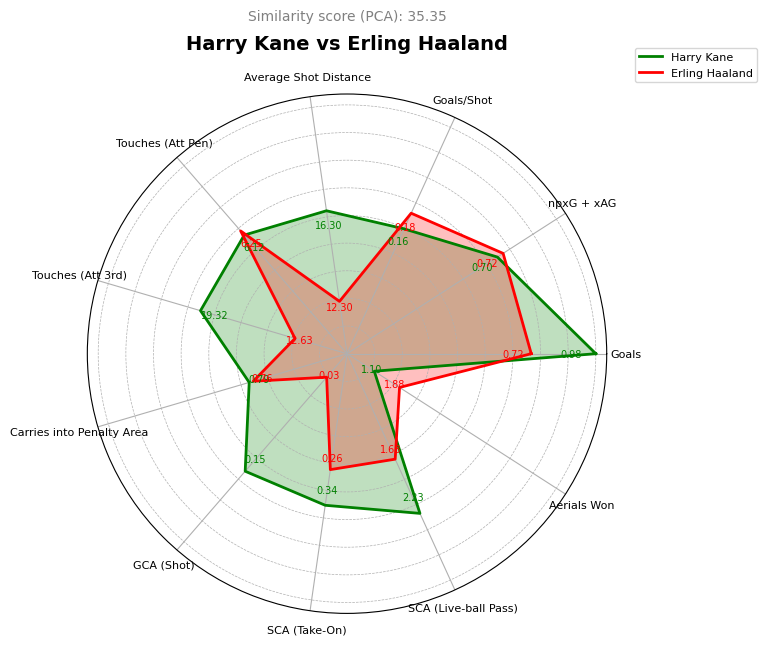

In [34]:
compare_two_players_radar_pca(
    player1_name="Harry Kane",
    player2_name="Erling Haaland",
    df=final_df_fw,
    features=features,
    df_pca=X_pca,
    cluster_labels=final_df_fw["Cluster"]
)

### Final Naming + Export

In [35]:
final_df_fw

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
1026,Romelu Lukaku,1993-05-13,SerieA,Napoli,Left,Belgium,Forwards,2843,0.44,0.32,...,0.0,1.08,1.33,1.77,42.9,1838,32.0,79.821259,79.821259,5
1027,Lautaro Martínez,1997-08-22,SerieA,Internazionale,Right,Argentina,Forwards,2564,0.42,0.11,...,0.0,2.56,1.23,1.33,47.9,1933,28.0,80.853042,80.853042,5
1028,Marcus Thuram,1997-08-06,SerieA,Internazionale,Right,France,Forwards,2290,0.55,0.16,...,0.0,2.79,1.77,1.34,57.0,1933,28.0,81.799962,81.799962,5
1029,Mehdi Taremi,1992-07-18,SerieA,Internazionale,Right,Iran,Forwards,816,0.11,0.22,...,0.0,3.20,2.10,2.65,44.2,1933,33.0,76.021652,76.021652,5
1030,Joaquín Correa,1994-08-13,SerieA,Internazionale,Right,Argentina,Forwards,731,0.25,0.25,...,0.0,3.82,0.74,2.22,25.0,1933,31.0,75.613077,75.613077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Patson Daka,1998-10-09,PremierLeague,Leicester City,Right,Zambia,Forwards,736,0.12,0.00,...,0.0,2.20,1.22,3.42,26.3,1960,27.0,71.113977,71.113977,4
1342,Liam Delap,2003-02-08,PremierLeague,Ipswich Town,Right,England,Forwards,2593,0.42,0.07,...,0.0,2.36,1.91,2.57,42.6,1797,22.0,75.364818,79.580400,5
1343,George Hirst,1999-02-15,PremierLeague,Ipswich Town,Right,Scotland,Forwards,661,0.41,0.14,...,0.0,1.63,4.36,3.13,58.2,1797,26.0,67.897459,67.897459,0
1344,Adam Armstrong,1997-02-10,PremierLeague,West Bromwich Albion,Right,England,Forwards,1248,0.14,0.14,...,0.0,1.66,0.36,0.65,35.7,1538,28.0,71.814573,71.814573,4


In [36]:
cluster_labels = {k: v[0] for k, v in cluster_names.items()}

final_df_fw["Cluster Name"] = final_df_fw["Cluster"].map(cluster_labels)

In [37]:
final_df_fw

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
1026,Romelu Lukaku,1993-05-13,SerieA,Napoli,Left,Belgium,Forwards,2843,0.44,0.32,...,1.08,1.33,1.77,42.9,1838,32.0,79.821259,79.821259,5,Dynamic Strike-Runners
1027,Lautaro Martínez,1997-08-22,SerieA,Internazionale,Right,Argentina,Forwards,2564,0.42,0.11,...,2.56,1.23,1.33,47.9,1933,28.0,80.853042,80.853042,5,Dynamic Strike-Runners
1028,Marcus Thuram,1997-08-06,SerieA,Internazionale,Right,France,Forwards,2290,0.55,0.16,...,2.79,1.77,1.34,57.0,1933,28.0,81.799962,81.799962,5,Dynamic Strike-Runners
1029,Mehdi Taremi,1992-07-18,SerieA,Internazionale,Right,Iran,Forwards,816,0.11,0.22,...,3.20,2.10,2.65,44.2,1933,33.0,76.021652,76.021652,5,Dynamic Strike-Runners
1030,Joaquín Correa,1994-08-13,SerieA,Internazionale,Right,Argentina,Forwards,731,0.25,0.25,...,3.82,0.74,2.22,25.0,1933,31.0,75.613077,75.613077,1,Hybrid Line Leaders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Patson Daka,1998-10-09,PremierLeague,Leicester City,Right,Zambia,Forwards,736,0.12,0.00,...,2.20,1.22,3.42,26.3,1960,27.0,71.113977,71.113977,4,Physical Disruptors
1342,Liam Delap,2003-02-08,PremierLeague,Ipswich Town,Right,England,Forwards,2593,0.42,0.07,...,2.36,1.91,2.57,42.6,1797,22.0,75.364818,79.580400,5,Dynamic Strike-Runners
1343,George Hirst,1999-02-15,PremierLeague,Ipswich Town,Right,Scotland,Forwards,661,0.41,0.14,...,1.63,4.36,3.13,58.2,1797,26.0,67.897459,67.897459,0,Aerial Target Men
1344,Adam Armstrong,1997-02-10,PremierLeague,West Bromwich Albion,Right,England,Forwards,1248,0.14,0.14,...,1.66,0.36,0.65,35.7,1538,28.0,71.814573,71.814573,4,Physical Disruptors


In [39]:
final_df_fw.to_csv("final_df_fw_with_clusters.csv", index=False)